In [102]:
# import necessary modules
from keras.datasets import cifar10
from keras import Sequential, layers, utils
from keras.optimizers import SGD
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as k
import matplotlib.pyplot as plt
import numpy as np

In [103]:
# here is a boilerplate code to train your code
# you can change it according to your convenience

In [104]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#y_train = utils.to_categorical(y_train, 10)
#y_test = utils.to_categorical(y_test, 10)

# normalization
x_train = (x_train - x_train.min(axis=0)) / (x_train.max(axis=0) - x_train.min(axis=0))
x_test = (x_test - x_test.min(axis=0)) / (x_test.max(axis=0) - x_test.min(axis=0))


#nn_model = create_model()
#history = nn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), shuffle=True)
#nn_model.summary()
print("Shape of X_train{}".format(x_train.shape))
print("Shape of Y_train{}".format(y_train.shape))
print("Shape of X_test{}".format(x_test.shape))
print("Shaoe of Y_test{}".format(y_test.shape))

Shape of X_train(50000, 32, 32, 3)
Shape of Y_train(50000, 1)
Shape of X_test(10000, 32, 32, 3)
Shaoe of Y_test(10000, 1)


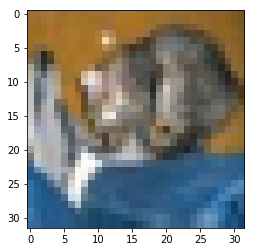

In [105]:
before_reshape_X_test=x_test
plt.imshow(x_test[0])

In [106]:
input_layer_size=np.prod(x_train.shape[1:])
print(input_layer_size)

3072


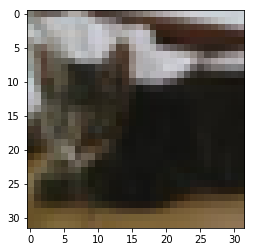

In [107]:

plt.imshow(x_train[9],cmap='gray')

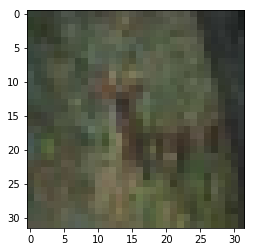

In [108]:
plt.imshow(x_train[10],cmap='gray')

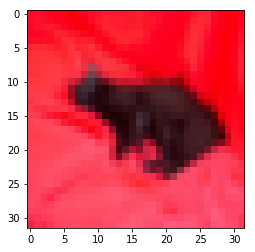

In [109]:
plt.imshow(x_train[21],cmap='gray')

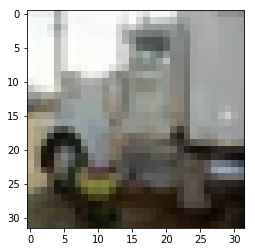

In [110]:
plt.imshow(x_train[31],cmap='gray')

In [111]:
print("Reshape of X_train{}".format(x_train.shape))

Reshape of X_train(50000, 32, 32, 3)


In [112]:

x_train=x_train.reshape(x_train.shape[0],input_layer_size)
x_test=x_test.reshape(x_test.shape[0],input_layer_size)

In [113]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [114]:
print("Reshape of X_train{}".format(x_train.shape))
print("Reshape of X_test{}".format(x_test.shape))
print("Reshape of Y_train{}".format(y_train.shape))
print("Reshape of Y_test{}".format(y_test.shape))

Reshape of X_train(50000, 3072)
Reshape of X_test(10000, 3072)
Reshape of Y_train(50000, 10)
Reshape of Y_test(10000, 10)


In [132]:

def create_model():
    model=Sequential()
    model.add(Dense(20,activation='relu',input_shape=(input_layer_size,)))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])
    history=model.fit(x_train,y_train,epochs=30,batch_size=256,validation_data=(x_test,y_test))
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
return

# Here have loss vs epoch with both train and test data and accuracy vs epoch with both train and test data

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 2s 32us/step - loss: 2.2148 - acc: 0.2037 - val_loss: 2.1202 - val_acc: 0.2344
Epoch 2/30
50000/50000 [==============================] - 1s 25us/step - loss: 2.0391 - acc: 0.2705 - val_loss: 1.9790 - val_acc: 0.2950
Epoch 3/30
50000/50000 [==============================] - 1s 25us/step - loss: 1.9429 - acc: 0.3068 - val_loss: 1.9164 - val_acc: 0.3198
Epoch 4/30
50000/50000 [==============================] - 1s 25us/step - loss: 1.8923 - acc: 0.3301 - val_loss: 1.8692 - val_acc: 0.3387
Epoch 5/30
50000/50000 [==============================] - 1s 25us/step - loss: 1.8586 - acc: 0.3445 - val_loss: 1.8457 - val_acc: 0.3445
Epoch 6/30
50000/50000 [==============================] - 1s 25us/step - loss: 1.8316 - acc: 0.3560 - val_loss: 1.8316 - val_acc: 0.3544
Epoch 7/30
50000/50000 [==============================] - 1s 25us/step - loss: 1.8074 - acc: 0.3644 - val_loss: 1.8249 - val_acc

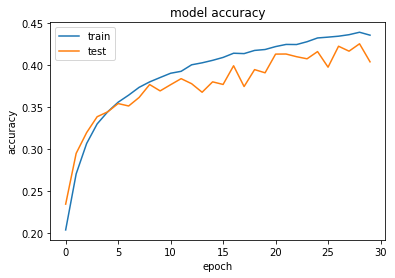

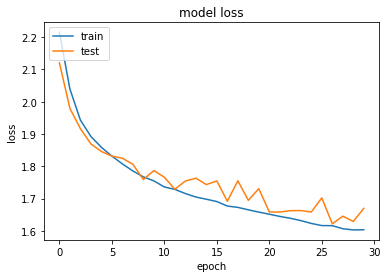

In [133]:
create_model()

In [134]:
[test_loss,test_acc]=model.evaluate(x_test,y_test)
print("Evaluation results on Test Data:Loss={}.accuracy={}".format(test_loss,test_acc))

10000/10000 [==============================] - 0s 33us/step
Evaluation results on Test Data:Loss=1.6474908803939818.accuracy=0.4209


In [135]:
probs=model.predict(x_test)

In [136]:
np.argmax(probs,axis=1)

array([3, 9, 8, ..., 5, 5, 7])

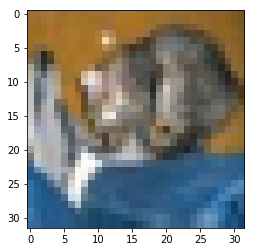

In [137]:
plt.imshow(before_reshape_X_test[0])

